In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 10杀时间统计

In [2]:
def get_source_json(filename):
    directory = os.path.join(os.path.pardir, "data", filename)
    with open(directory, "r", encoding="utf-8") as f:
        json_file = json.load(f)
    return json_file

result_info = get_source_json("parser_result_info.json")["RECORDS"]
kill_10_time = []
for match in result_info:
    kill_10_time.append(match["kill_10_time"])
print(kill_10_time[0:10])

[824, 467, 656, 782, 653, 717, 869, 549, 552, 870]


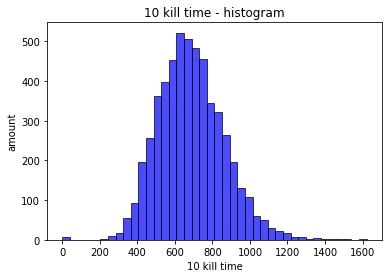

In [3]:
plt.hist(kill_10_time, bins=40, density=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("10 kill time")
plt.ylabel("amount")
plt.title("10 kill time - histogram")
plt.show()

In [4]:
detail_info = get_source_json("parser_detail_info.json")["RECORDS"]
print(len(result_info), len(detail_info))

5387 5387


In [5]:
for i in range(len(detail_info)):
    if result_info[i]["match_id"] != detail_info[i]["match_id"]:
        print(i, result_info[i]["match_id"])
        break

In [43]:
def str_2_list(string):
    if string != "[]":
        # print(string)
        l = list(map(int, string.strip("[]").split(", ")))
    else:
        l = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
    return l

raw_data = []
print(str_2_list(detail_info[i]["hero_id"]))
for i in range(len(detail_info)):
    d = []
    for index in range(10):
        row = []
        row.append(str_2_list(detail_info[i]["hero_id"])[index])
        row.append(str_2_list(result_info[i]["kill_10_details_kill"])[index])
        row.append(str_2_list(result_info[i]["kill_10_details_dead"])[index])
        row.append(str_2_list(result_info[i]["kill_10_details_assist"])[index])
        d.append(row)
    raw_data.append(d)
    # print(i)
print(raw_data[0])

[53, 30, 41, 14, 106, 7, 86, 44, 120, 35]
[[16, 3, 5, 2], [17, 2, 4, 0], [99, 1, 0, 3], [112, 2, 4, 0], [81, 2, 4, 0], [47, 0, 0, 2], [119, 0, 2, 3], [77, 0, 0, 1], [57, 3, 0, 1], [100, 1, 2, 3]]


In [47]:
p1_data = []
for line in raw_data:
    radi_s, dire_s = 0, 0
    for i in range(5):
        radi_s += line[i][1]
        dire_s += line[i+5][1]
    if radi_s >= 9:
        p1_data.append(line[0:5])
    elif dire_s >= 9:
        p1_data.append(line[5:10])
print(p1_data[3])

[[51, 0, 1, 1], [79, 0, 3, 0], [15, 1, 0, 0], [2, 6, 0, 4], [39, 3, 1, 0]]
